# Train a regression ConvNN model using BOHB tuner

In [1]:
import sys  
sys.path.insert(0, '../telescopeML/')

from DeepRegTrainer import *
from DeepRegBuilder import *
from StatVisAnalyzer import regression_report

Loading BokehJS ...

# Step 1: Load the dataset

In [2]:
# original dataset
df=pd.read_csv('../../datasets/browndwarf_R100_v4_newWL_v2.csv.bz2', compression='bz2')
df.head(3)

gravity  temperature  c_o_ratio  metallicity         2.512         2.487  \
0      5.0         1100       0.25         -1.0  9.103045e-08  1.181658e-07   
1      5.0         1100       0.25         -0.7  9.103045e-08  1.181658e-07   
2      5.0         1100       0.25         -0.5  9.103045e-08  1.181658e-07   

          2.462         2.438         2.413         2.389  ...         0.971  \
0  1.307868e-07  1.269229e-07  1.159179e-07  8.925110e-08  ...  9.640859e-08   
1  1.307868e-07  1.269229e-07  1.159179e-07  8.925110e-08  ...  9.640859e-08   
2  1.307868e-07  1.269229e-07  1.159179e-07  8.925110e-08  ...  9.640859e-08   

          0.962         0.952         0.943         0.933         0.924  \
0  7.612550e-08  6.901364e-08  6.247359e-08  4.112384e-08  5.127995e-08   
1  7.612550e-08  6.901364e-08  6.247359e-08  4.112384e-08  5.127995e-08   
2  7.612550e-08  6.901364e-08  6.247359e-08  4.112384e-08  5.127995e-08   

          0.915         0.906         0.897  is_augmented  
0  4.897355e-08  4.087795e-08  2.791689e-08            no  
1  4.897355e-08  4.087795e-08  2.791689e-08            no  
2  4.897355e-08  4.087795e-08  2.791689e-08            no  

[3 rows x 109 columns]

In [3]:
wl = pd.read_csv('../../datasets/wl.csv')
wl.head(3)

wl
0  2.511960
1  2.486966
2  2.462220

In [4]:
df.iloc[::10]

gravity  temperature  c_o_ratio  metallicity         2.512  \
0         5.00         1100       0.25         -1.0  9.103045e-08   
10        5.00         1100       0.25          1.7  8.540979e-09   
20        5.00         1100       0.50          1.0  2.089233e-08   
30        5.00         1100       1.00          0.5  3.773544e-08   
40        5.00         1100       1.50          0.0  7.403044e-08   
...        ...          ...        ...          ...           ...   
30840     3.25         1000       1.00         -1.0  6.179704e-08   
30850     3.25         1000       1.00          1.7  4.587650e-09   
30860     3.25         1000       1.50          1.0  9.151923e-09   
30870     3.25         1000       2.00          0.5  1.755109e-08   
30880     3.25         1000       2.50          0.0  3.686351e-08   

              2.487         2.462         2.438         2.413         2.389  \
0      1.181658e-07  1.307868e-07  1.269229e-07  1.159179e-07  8.925110e-08   
10     9.610928e-09  8.362026e-09  6.331807e-09  5.411898e-09  3.597492e-09   
20     2.547443e-08  2.398659e-08  1.954245e-08  1.673706e-08  1.128757e-08   
30     4.306029e-08  3.789344e-08  2.982717e-08  2.555826e-08  1.704151e-08   
40     8.240733e-08  7.323895e-08  5.885655e-08  5.086389e-08  3.452053e-08   
...             ...           ...           ...           ...           ...   
30840  6.023661e-08  4.317990e-08  3.128656e-08  2.771920e-08  1.748527e-08   
30850  3.838308e-09  2.586146e-09  1.860407e-09  1.635306e-09  1.152218e-09   
30860  7.599074e-09  4.870096e-09  3.395405e-09  2.993091e-09  2.001870e-09   
30870  1.456820e-08  9.125922e-09  6.253583e-09  5.540055e-09  3.570220e-09   
30880  3.103918e-08  1.962829e-08  1.351563e-08  1.204704e-08  7.567159e-09   

       ...         0.971         0.962         0.952         0.943  \
0      ...  9.640859e-08  7.612550e-08  6.901364e-08  6.247359e-08   
10     ...  2.589948e-09  1.400508e-09  1.423739e-09  1.331622e-09   
20     ...  1.030422e-08  6.744711e-09  6.570654e-09  5.994584e-09   
30     ...  3.370933e-08  2.475817e-08  2.292027e-08  2.084380e-08   
40     ...  1.067845e-07  8.506743e-08  7.629151e-08  6.833675e-08   
...    ...           ...           ...           ...           ...   
30840  ...  6.074206e-08  4.763676e-08  4.974581e-08  4.320090e-08   
30850  ...  1.364340e-09  8.768095e-10  8.903187e-10  7.791423e-10   
30860  ...  8.316857e-09  5.922216e-09  5.734787e-09  5.036230e-09   
30870  ...  3.041929e-08  2.417082e-08  2.437794e-08  2.183006e-08   
30880  ...  8.623869e-08  7.376951e-08  7.271418e-08  6.568662e-08   

              0.933         0.924         0.915         0.906         0.897  \
0      4.112384e-08  5.127995e-08  4.897355e-08  4.087795e-08  2.791689e-08   
10     5.718932e-10  2.525684e-09  2.577776e-09  2.171606e-09  1.170498e-09   
20     3.266539e-09  6.722988e-09  6.756289e-09  5.708415e-09  3.422240e-09   
30     1.293259e-08  1.818421e-08  1.723477e-08  1.401317e-08  8.880054e-09   
40     4.665959e-08  5.297000e-08  4.829532e-08  3.887601e-08  2.587082e-08   
...             ...           ...           ...           ...           ...   
30840  2.942153e-08  4.588604e-08  4.660016e-08  3.899730e-08  2.401752e-08   
30850  4.586279e-10  1.281345e-09  9.366753e-10  5.737637e-10  3.020979e-10   
30860  3.292385e-09  4.859911e-09  3.820969e-09  2.376922e-09  1.196810e-09   
30870  1.552078e-08  1.638151e-08  1.205167e-08  7.349473e-09  3.697040e-09   
30880  4.948854e-08  5.133128e-08  4.178225e-08  2.698869e-08  1.426723e-08   

       is_augmented  
0                no  
10               no  
20               no  
30               no  
40               no  
...             ...  
30840            no  
30850            no  
30860            no  
30870            no  
30880            no  

[3089 rows x 109 columns]

## Prepare feature variables (X) and targets (y)

In [5]:
df = df[df['is_augmented'].isin(['no'])]
X = df.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity', 
             'is_augmented'])#.astype(np.float32)

y = df[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]#.astype(np.float32)


In [6]:
y['temperature'] = np.log10(y['temperature'])

/var/folders/30/n2yd25m90v1bywy0rcgx4fqc0000gq/T/ipykernel_33536/3354840019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['temperature'] = np.log10(y['temperature'])


In [7]:
# print( 'skewness:' )
# display(set( zip(['gravity', 'c_o_ratio', 'metallicity', 'temperature'],(stats.skew(y[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]])))))
# y.hist(grid=True, bins=19);

In [8]:
y.head(5)

gravity  c_o_ratio  metallicity  temperature
0      5.0       0.25         -1.0     3.041393
1      5.0       0.25         -0.7     3.041393
2      5.0       0.25         -0.5     3.041393
3      5.0       0.25         -0.3     3.041393
4      5.0       0.25          0.0     3.041393

---

# Step 2: Data Processing

In [9]:
# Create an instance of TrainCNNRegression
train_cnn_regression = TrainRegression(feature_values=X,
                             feature_names=X.columns,
                             target_values=y.to_numpy(),
                             target_name=['gravity', 'c_o_ratio', 'metallicity', 'temperature'],
                             is_tuned='yes',
                             param_grid=None,
                             spectral_resolution=100,
                             is_feature_improved='no',
                             is_augmented='no',
                             ml_model=None,
                             ml_model_str='CNN')

In [10]:
# Split the dataset into train and test sets
train_cnn_regression.split_train_validation_test(test_size=0.1, val_size=0.1)

In [11]:
# normalize the X features using MinMax Scaler
train_cnn_regression.standardize_X_row_wise()

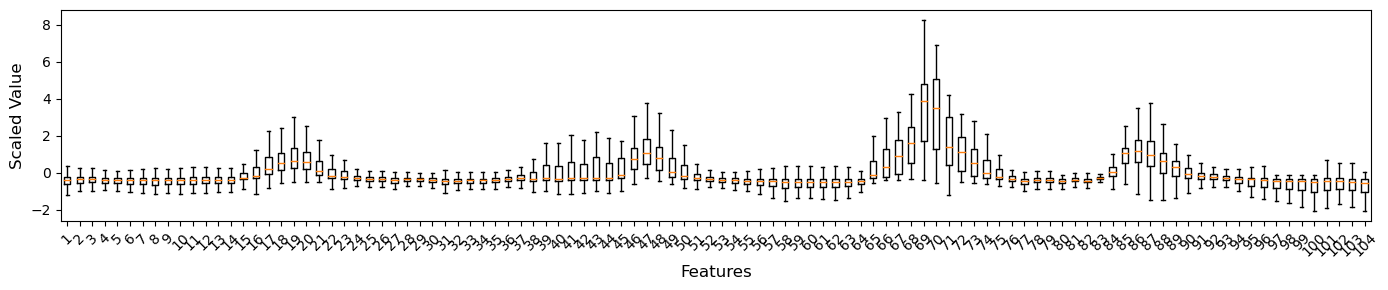

In [12]:
train_cnn_regression.plot_boxplot_scaled_features(train_cnn_regression.X_train_standardized_rowwise)

In [13]:
# Standardize the y features using Standard Scaler
train_cnn_regression.standardize_y_column_wise()

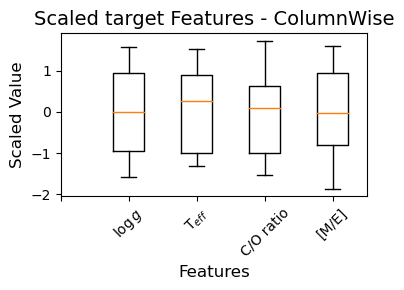

In [14]:
train_cnn_regression.plot_boxplot_scaled_features(scaled_feature= train_cnn_regression.y_train_standardized_columnwise, 
                                                  xticks_list = ['','$\log g$', 'T$_{eff}$', 'C/O ratio', '[M/E]'],
                                                  title = 'Scaled target Features - ColumnWise',
                                                  fig_size=(4, 3),
                                                    )

In [15]:
# train_cnn_regression.y_train_standardized_columnwise

In [16]:
train_cnn_regression.X_train_min = train_cnn_regression.X_train.min(axis=1)
train_cnn_regression.X_train_max = train_cnn_regression.X_train.max(axis=1)

In [17]:
train_cnn_regression.X_val_min = train_cnn_regression.X_val.min(axis=1)
train_cnn_regression.X_val_max = train_cnn_regression.X_val.max(axis=1)

In [18]:
train_cnn_regression.X_test_min = train_cnn_regression.X_test.min(axis=1)
train_cnn_regression.X_test_max = train_cnn_regression.X_test.max(axis=1)

In [19]:
df_MinMax_train = pd.DataFrame((train_cnn_regression.X_train_min, train_cnn_regression.X_train_max)).T
df_MinMax_val = pd.DataFrame((train_cnn_regression.X_val_min, train_cnn_regression.X_val_max)).T
df_MinMax_test = pd.DataFrame((train_cnn_regression.X_test_min, train_cnn_regression.X_test_max)).T

In [20]:
df_MinMax_train.rename(columns={0:'min', 1:'max'}, inplace=True)

In [21]:
df_MinMax_train.head()

min           max
28744  8.265340e-12  3.445259e-08
6288   8.080712e-22  8.397132e-14
13749  2.734403e-07  8.632182e-06
11713  4.414951e-16  3.373262e-10
15538  3.722576e-07  6.859888e-06

In [22]:
# plt.loglog(train_cnn_regression.X_train_max, 'k.', alpha = 0.4)
# plt.loglog(train_cnn_regression.X_train, 'r.', label='X_train', alpha = 0.4)
# plt.loglog(train_cnn_regression.X_train_min, 'r.', alpha = 0.4)

---

In [23]:
train_cnn_regression.standardize_X_column_wise(
                                                X_train = df_MinMax_train.values,
                                                X_val   = df_MinMax_val.values,
                                                X_test  = df_MinMax_test.values,
                                                )

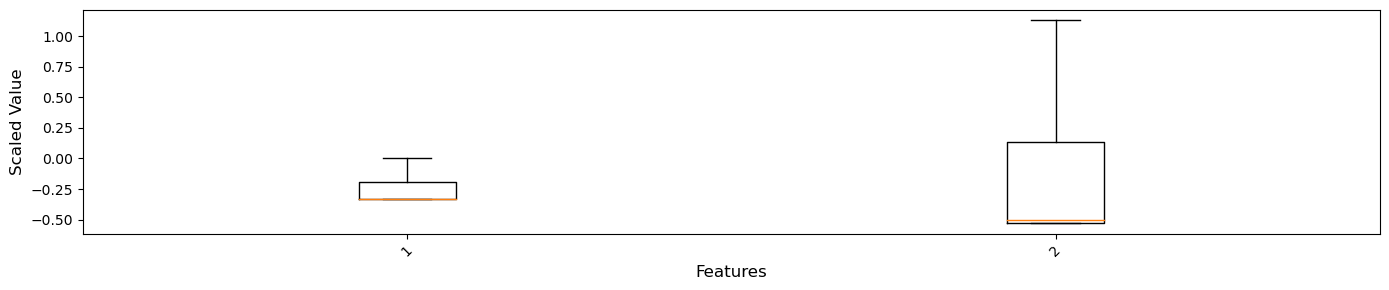

In [24]:
train_cnn_regression.plot_boxplot_scaled_features(train_cnn_regression.X_test_standardized_columnwise)

# Step 3: Train CNN model

In [25]:
train_cnn_model = TrainCNN(
            # input dataset: StandardScaled instances  
            X1_train = train_cnn_regression.X_train_standardized_rowwise,
            X1_val   = train_cnn_regression.X_val_standardized_rowwise,
            X1_test  = train_cnn_regression.X_test_standardized_rowwise,

            # input dataset: Min Max of each instance  
            X2_train = train_cnn_regression.X_train_standardized_columnwise,
            X2_val   = train_cnn_regression.X_val_standardized_columnwise,
            X2_test  = train_cnn_regression.X_test_standardized_columnwise,

            # 1st target
            y1_train = train_cnn_regression.y_train_standardized_columnwise[:,0],
            y1_val   = train_cnn_regression.y_val_standardized_columnwise[:,0],
            y1_test  = train_cnn_regression.y_test_standardized_columnwise[:,0],

            # 2nd target
            y2_train = train_cnn_regression.y_train_standardized_columnwise[:,1],
            y2_val   = train_cnn_regression.y_val_standardized_columnwise[:,1],
            y2_test  = train_cnn_regression.y_test_standardized_columnwise[:,1],

            # 3rd target
            y3_train = train_cnn_regression.y_train_standardized_columnwise[:,2],
            y3_val   = train_cnn_regression.y_val_standardized_columnwise[:,2],
            y3_test  = train_cnn_regression.y_test_standardized_columnwise[:,2],

            # 4th target
            y4_train = train_cnn_regression.y_train_standardized_columnwise[:,3],
            y4_val   = train_cnn_regression.y_val_standardized_columnwise[:,3],
            y4_test  = train_cnn_regression.y_test_standardized_columnwise[:,3],
            )

In [26]:
hyperparameters = {
    'Conv__num_blocks': 4,
    'Conv__num_layers_per_block': 3,
    'Conv__num_filters': 8,
    'Conv__kernel_size': 3,
    'Conv__MaxPooling1D': 2,
    'FC1__num_blocks': 1,
    'FC1_num_layers_per_block': 3,
    'FC1__units': 128,
    'FC1__dropout': 0.2,
    'FC2__num_blocks': 1,
    'FC2_num_layers_per_block': 2,
    'FC2__units': 128,
    'FC2__dropout': 0.2,
    'learning_rate' : 0.0001
}



In [27]:
train_cnn_model.build_model(hyperparameters = hyperparameters, 
                     )

2023-07-31 20:44:44.776365: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 104, 1)]     0                                            
__________________________________________________________________________________________________
Conv__B1_L1 (Conv1D)            (None, 104, 32)      128         input_1[0][0]                    
__________________________________________________________________________________________________
Conv__B1_L2 (Conv1D)            (None, 104, 128)     12416       Conv__B1_L1[0][0]                
__________________________________________________________________________________________________
Conv__B1_L3 (Conv1D)            (None, 104, 288)     110880      Conv__B1_L2[0][0]                
______________________________________________________________________________________________

In [28]:
history, model =  train_cnn_model.fit_cnn_model(budget=2)

Epoch 1/2


2023-07-31 20:44:45.125817: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


 38/782 [>.............................] - ETA: 4:22 - loss: 1.2986 - FC3__gravity_loss: 0.4107 - FC3__c_o_ratio_loss: 0.4411 - FC3__metallicity_loss: 0.2882 - FC3__temperature_loss: 0.1586 - FC3__gravity_mae: 0.7960 - FC3__c_o_ratio_mae: 0.8399 - FC3__metallicity_mae: 0.6298 - FC3__temperature_mae: 0.4172

Exception ignored in: <function ScopedTFGraph.__del__ at 0x7fd900534160>
Traceback (most recent call last):
  File "/usr/local/anaconda3/envs/ml/lib/python3.9/site-packages/tensorflow/python/framework/c_api_util.py", line 57, in __del__
KeyboardInterrupt: 


KeyboardInterrupt: 

In [233]:
train_cnn_model.model

In [234]:
tf.keras.utils.plot_model(
                train_cnn_model.model,
                to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
#                 show_layer_activations=False,
)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


## Save Trained Model

In [270]:
train_cnn_regression.trained_model.save('../../outputs/trained_models/trained_CNN_architecture_Toy_parameters__newbuild_v1.h5')
train_cnn_regression.trained_model.save_weights('../../outputs/trained_models/trained_CNN_weights_Toy_parameters__newbuild_v1.h5')

# with open('../../outputs/trained_models/trained_CNN_history_Toy_parameters_v1.pkl', 'wb') as file:
#     pk.dump(train_cnn_regression.trained_model_history, file)
    


## Load Saved Models

In [69]:
# model = load_model('../../outputs/regression/trained_models/my_model_architecture__xStand_yStand_MinMax_v2.h5')
# model.load_weights('../../outputs/regression/trained_models/my_model_weights__xStand_yStand_MinMax_v2.h5')

# # Loading the saved history object
# with open('../../outputs/regression/trained_models/training_history__xStand_yStand_MinMax_v2.pkl', 'rb') as file:
#     history = pk.load(file)    

In [271]:
model = load_model('../../outputs/trained_models/trained_CNN_architecture_Toy_parameters__newbuild_v1.h5')
model.load_weights('../../outputs/trained_models/trained_CNN_weights_Toy_parameters__newbuild_v1.h5')

# Loading the saved history object
# with open('../../outputs/trained_models/trained_CNN_history_Toy_parameters_v1.pkl', 'rb') as file:
#     history = pk.load(file)    

In [273]:
train_cnn_regression.trained_model = model
# train_cnn_regression.trained_model_history = history

# Step 4: Check Trained Model

---

In [274]:
tf.keras.utils.plot_model(
                train_cnn_regression.trained_model,
                # to_file="model.png",
                show_shapes=True,
                show_dtype=False,
                show_layer_names=True,
                rankdir="TB",
                expand_nested=True,
                dpi=90,
                layer_range=None,
                show_layer_activations=False,
)

TypeError: plot_model() got an unexpected keyword argument 'show_layer_activations'

In [275]:
train_cnn_regression.trained_model.summary()

Model: "model_56"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_136 (InputLayer)          [(None, 104, 1)]     0                                            
__________________________________________________________________________________________________
Conv__B1_L1 (Conv1D)            (None, 104, 32)      128         input_136[0][0]                  
__________________________________________________________________________________________________
Conv__B1_L2 (Conv1D)            (None, 104, 128)     12416       Conv__B1_L1[0][0]                
__________________________________________________________________________________________________
Conv__B1_L3 (Conv1D)            (None, 104, 288)     110880      Conv__B1_L2[0][0]                
___________________________________________________________________________________________

In [276]:
train_cnn_regression.plot_model_loss(title = 'X:StandRow, y:StandCol - MinMax:StandCol, ToyCNNmodel')

TypeError: 'NoneType' object is not subscriptable

### Plot Y predicted vs Y_Actual: Histogram & Scatter plot

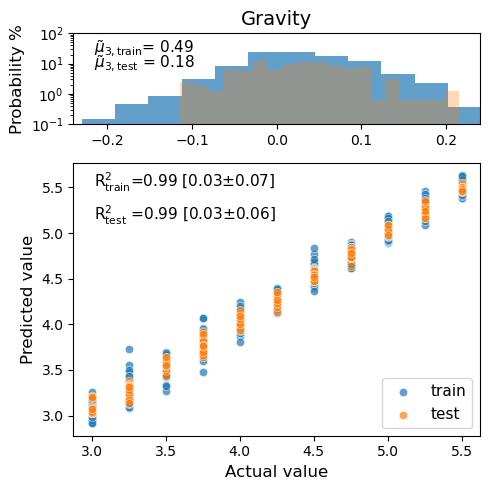

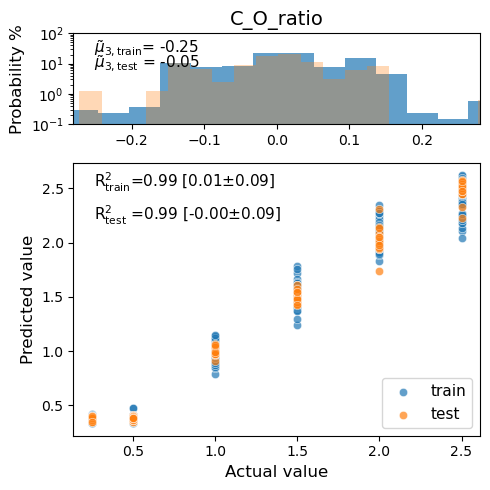

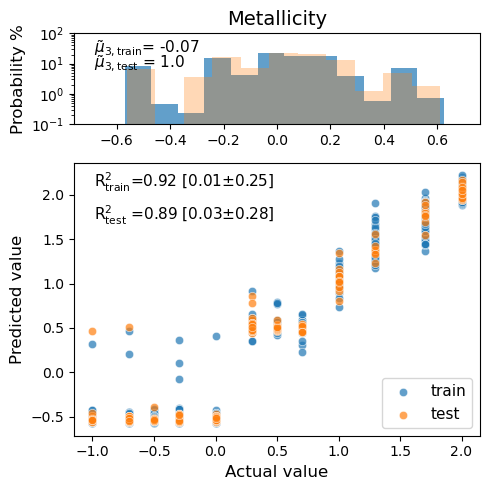

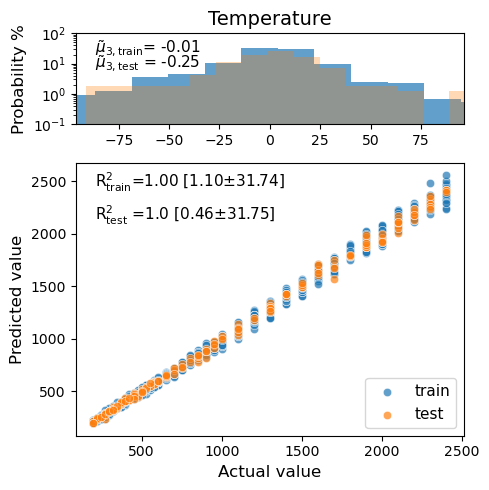

In [277]:
i = 19
regression_report(
        trained_model = train_cnn_regression,
    
        Xtrain = [train_cnn_regression.X_train_standardized_rowwise[::i],
                  train_cnn_regression.X_train_standardized_columnwise[::i]],
    
        Xtest  = [train_cnn_regression.X_test_standardized_rowwise[::i], 
                  train_cnn_regression.X_test_standardized_columnwise[::i]],
    
        ytrain = train_cnn_regression.y_train_standardized_columnwise[::i],
    
        ytest  = train_cnn_regression.y_test_standardized_columnwise[::i],
    
        target_i = 4,
        
        xy_top   = [0.05, 0.7],
        xy_bottom= [0.05, 0.85],
        print_results = False,        
                 )